# Traffic Forecasting Analysis

Traffic predictions using different models.

Import required package and connect to Google Drive

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Get dataset files

In [2]:
#METR-LA dataset without saturdays and sundays
!cp /content/drive/MyDrive/modified-METRLA.csv /content/dataset.csv

#Pems-bay dataset
#!cp /content/drive/MyDrive/pems-bay.csv /content/dataset.csv

#Pemsd7-m dataset
#!cp /content/drive/MyDrive/pemsd7-m.csv /content/dataset.csv

Create DataFrame and visualize its structure

In [3]:
#dataset path
path = '/content/dataset.csv'

df = pd.read_csv(path, index_col=None)

In [4]:
#remove entries with null values
df = df.dropna(axis=0)

shape = df.shape
size = df.size

print(f'Dataframe shape: {shape}')
print(f'Number of elements: {size}')
df.head()

Dataframe shape: (24480, 208)
Number of elements: 5091840


,Unnamed: 0,773869,767541,767542,717447,717446,717445,773062,767620,737529,...,772167,769372,774204,769806,717590,717592,717595,772168,718141,769373
0,2012-03-01 00:00:00,64.375000,67.625000,67.125000,61.500000,66.875000,68.750000,65.125,67.125,59.625000,...,45.625000,65.500,64.500000,66.428571,66.875,59.375000,69.000000,59.250000,69.000000,61.875
1,2012-03-01 00:05:00,62.666667,68.555556,65.444444,62.444444,64.444444,68.111111,65.000,65.000,57.444444,...,50.666667,69.875,66.666667,58.555556,62.000,61.111111,64.444444,55.888889,68.444444,62.875
2,2012-03-01 00:10:00,64.000000,63.750000,60.000000,59.000000,66.500000,66.250000,64.500,64.250,63.875000,...,44.125000,69.000,56.500000,59.250000,68.125,62.500000,65.625000,61.375000,69.857143,62.000
3,2012-03-01 00:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000
4,2012-03-01 00:20:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000


In [5]:
#convert to numpy array
dataset = df.values

Visualize values from a sensor in the first day

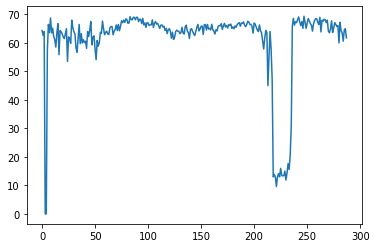

In [6]:
#number of values in a day
day_size = 288

#select sensor
sensorID = 1

#extract values from sensor
sensor = dataset[:, sensorID]

plt.plot(np.arange(day_size), sensor[:day_size])
plt.show()

## Models

### Regression for all data

Predict all the velocity values in future days

In [7]:
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
#X set contains number of day, type of weekday and time
X = np.ndarray(shape=(dataset.shape[0], 3))

#variable that indicates the day (0=monday,..., 4=friday)
day_index = -1
for i in range(dataset.shape[0]):
  if i%288 == 0:
    day_index = (day_index + 1) % 5
  X[i,:] = np.array([i, day_index, i%day_size])

Y = dataset[:, 1:]

#scale data
scaler = StandardScaler()
scaler.fit(X)

X_scale = scaler.transform(X)

#divide in train and set
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=1)

In [10]:
regr = MLPRegressor(random_state=1, max_iter=100, hidden_layer_sizes=(3, 100, 200, 400, 208), solver='adam', n_iter_no_change=50, verbose=True)
regr.fit(X_train, Y_train)

Iteration 1, loss = 581.91112186
Iteration 2, loss = 179.88946389
Iteration 3, loss = 178.98408850
Iteration 4, loss = 178.49398037
Iteration 5, loss = 178.03996317
Iteration 6, loss = 177.25122554
Iteration 7, loss = 177.04162268
Iteration 8, loss = 176.53448461
Iteration 9, loss = 176.00126849
Iteration 10, loss = 175.81005370
Iteration 11, loss = 174.70713743
Iteration 12, loss = 174.31198196
Iteration 13, loss = 174.05014695
Iteration 14, loss = 172.45301380
Iteration 15, loss = 171.68043273
Iteration 16, loss = 170.20532151
Iteration 17, loss = 168.81934977
Iteration 18, loss = 166.73660900
Iteration 19, loss = 166.19106654
Iteration 20, loss = 165.68324294
Iteration 21, loss = 164.35359432
Iteration 22, loss = 163.85036578
Iteration 23, loss = 162.41370511
Iteration 24, loss = 162.46155938
Iteration 25, loss = 160.91920598
Iteration 26, loss = 159.62586974
Iteration 27, loss = 159.40731564
Iteration 28, loss = 157.37456597
Iteration 29, loss = 156.21036236
Iteration 30, loss = 15

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(3, 100, 200, 400, 208), max_iter=100,
             n_iter_no_change=50, random_state=1, verbose=True)

Test score

In [12]:
preds = regr.predict(X_test)

score = regr.score(X_test, Y_test)
mse = mean_squared_error(preds, Y_test)
mae = mean_absolute_error(preds, Y_test)
mape = mean_absolute_percentage_error(preds, Y_test)

print(f'SCORE: {score:.4f}\n')
print(f'MSE: {mse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'MAPE: {mape:.4f}')

SCORE: 0.3644

MSE: 220.9661
MAE: 9.1200
MAPE: 0.2226


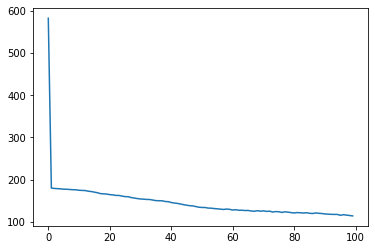

In [14]:
#plot loss curve
plt.plot(np.arange(100), regr.loss_curve_)
plt.show()

Predicitons

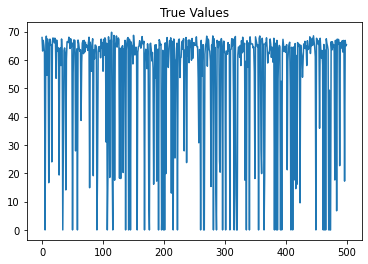

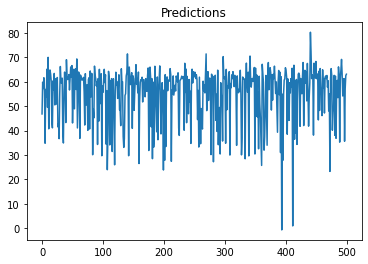

In [17]:
predictions = regr.predict(X_test)

plt.plot(np.arange(500), Y_test[:500,0], label='True values')
plt.title('True Values')
plt.show()

plt.plot(np.arange(500), predictions[:500,0], label='Predictions')
plt.title('Predictions')
plt.show()

### Regression for daily predictions

Train the first 20 hours of each day and try to predict the last 4 hours of each day

In [18]:
#remove date values
data = dataset[:,1:]

scores = []
mse_errors = []
mae_errors = []
mape_errors = []

for i in range(0, data.shape[0], 288):
  #create X and Y sets
  X_set = [(i, 0) for i in range(288)]
  Y_set = data[i:i+288,:]

  X_train, X_test, Y_train, Y_test = X_set[:240], X_set[240:], Y_set[:240], Y_set[240:]

  #train
  regr = MLPRegressor(random_state=1, max_iter=200, hidden_layer_sizes=(1, 25, 50, 100, 208), solver='adam', n_iter_no_change=40)
  regr.fit(X_train, Y_train)

  #evaluate
  scores.append(regr.score(X_test, Y_test))
  preds = regr.predict(X_test)
  mse_errors.append(mean_squared_error(preds, Y_test))
  mae_errors.append(mean_absolute_error(preds, Y_test))
  mape_errors.append(mean_absolute_percentage_error(preds, Y_test))

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Plot infos

AVERAGE SCORE = -54.810915243384365
MIN ERROR = 292.29681426625206


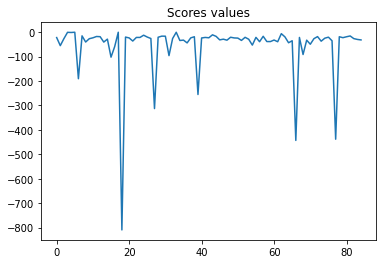

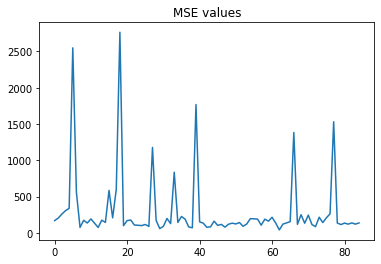

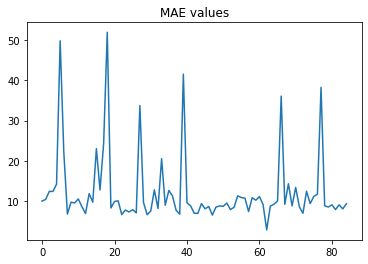

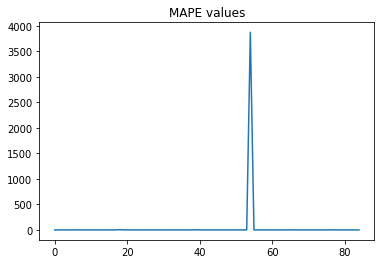

In [21]:
print(f'AVERAGE SCORE = {sum(scores)/len(scores)}')
print(f'MIN ERROR = {sum(mse_errors)/len(mse_errors)}')

plt.plot(range(len(scores)), scores)
plt.title('Scores values')
plt.show()

plt.plot(range(len(mse_errors)), mse_errors)
plt.title('MSE values')
plt.show()

plt.plot(range(len(mae_errors)), mae_errors)
plt.title('MAE values')
plt.show()

plt.plot(range(len(mape_errors)), mape_errors)
plt.title('MAPE values')
plt.show()

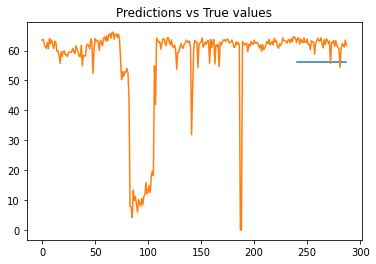

In [22]:
#plot prediction of last sensor
sensor_num = 206
plt.plot(range(240, 288), regr.predict(X_test)[:,sensor_num], label='Predictions')
plt.plot(range(288), Y_set[:,sensor_num], label='True values')
plt.title('Predictions vs True values')
plt.show()

It does not seem to be able to learn as we would expect.